# Principal Component Analysis with Cancer Data

In [295]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from scipy.stats import zscore

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [296]:
cancer_df = pd.read_csv("C:\\Users\\Sasikumar Bala\\JupyterWorkspace\\Internal_Lab\\Cancer.csv")

In [298]:
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


 <font color=darkblue>

# Observations:
   - Id columns is to identify rows hence can be skipped in analysis
   - All columns have numerical values
   - Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [299]:
# Print the columns in the dataframe
for idx in cancer_df.columns:
        print(' Attribute name - ',idx, ' is of dtypes - ',cancer_df.dtypes[idx])
        
print("Shape - ","There are ", cancer_df.shape[0]," Rows and ", cancer_df.shape[1]," Columns")        

 Attribute name -  ID  is of dtypes -  int64
 Attribute name -  ClumpThickness  is of dtypes -  int64
 Attribute name -  Cell Size  is of dtypes -  int64
 Attribute name -  Cell Shape  is of dtypes -  int64
 Attribute name -  Marginal Adhesion  is of dtypes -  int64
 Attribute name -  Single Epithelial Cell Size  is of dtypes -  int64
 Attribute name -  Bare Nuclei  is of dtypes -  object
 Attribute name -  Normal Nucleoli  is of dtypes -  int64
 Attribute name -  Bland Chromatin  is of dtypes -  int64
 Attribute name -  Mitoses  is of dtypes -  int64
 Attribute name -  Class  is of dtypes -  int64
Shape -  There are  699  Rows and  11  Columns


In [300]:
cancer_df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [301]:
cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


 <font color=darkblue>

# Observations:
 - There is 16 values with "?" for the column Bare Nuclei, We need to treat this dataset.
 - There is an ID column,hence can be skipped in analysis.
 - All the columns are integer (INT64) except Bare Nuclei column.
 - Most of the columns have the range from Minimum value as 1 to Maximum value as 10.
 - Shape of the Dataset:-  There are  699  Rows and  11  Columns

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [207]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

if(cancer_df.isnull().sum().any() and cancer_df.isna().sum().any()):
    print('The dataset contains null data points')
else:
    print('There are no null data points from other columns')

There are no null data points from other columns


In [304]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

# Replacing the missing value '?' with 1 as it has the highest occurrence of 402,16 values are corrupted. 
# We can either delete them as it forms roughly 2% of data.

cancer_df['Bare Nuclei'] = np.where(cancer_df['Bare Nuclei']=='?','1',cancer_df['Bare Nuclei'])

cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype('int64')

In [305]:
# Now the "?" has been replaced by 1 and the total value count of 1 is 418
cancer_df['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [306]:
cancer_df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [307]:
# Below are the Duplicate Check on the data set to identify How many Patients Id are Duplicated.
print('There are ',cancer_df.duplicated().sum()," Duplicated Patients Id rows ")

There are  9  Duplicated Patients Id rows 


In [308]:
# Below are the duplicate rows
cancer_df[cancer_df.duplicated()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [309]:
# Deleting the Duplciated rows by keeping the first instance alone.
cancer_df.drop_duplicates(keep='first',inplace=True)

In [310]:
print('There are ',cancer_df.duplicated().sum()," Duplicate rows ")

There are  0  Duplicate rows 


In [312]:
## Dropping the ID column which is not neccessary for further analysis
cancer_df = cancer_df.drop('ID',axis =1)

In [314]:
# converted all the column to INT64
cancer_df.dtypes

ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [315]:
# Check for correlation of variables

cancer_df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


<AxesSubplot:>

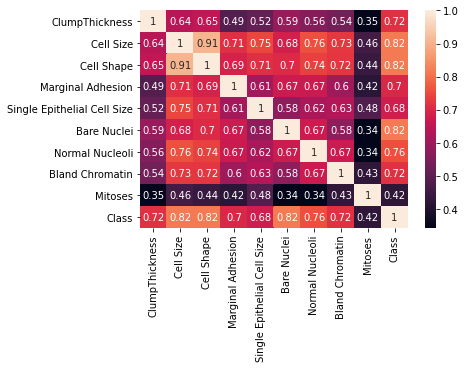

In [316]:
sns.heatmap(cancer_df.corr(),annot =True)

 <font color=darkblue>

# Observation from above Heat Map:

- Seeing some strongest correlation between Cell size and Cell Shape of 0.91.

- Target variable shows high correlation with most of these variables

- Strong correlation between Cell Size and Marginal Adhesion, Cell Size and Single epithelial cell size, 
  cell size and Bare Nuclei, Cell Size and Normal Nuclei and Cell Size and Bland Chromatin.
  
- Strong correlation between Cell Shape and Marginal Adhesion, Cell Shape and Single epithelial cell size, 
  cell Shape and Bare Nuclei, Cell Shape and Normal Nuclei and Cell Shape and Bland Chromatin.
  
- Strong correlation between Marginal Adhesion and Cell Size, Marginal Adhesion and Cell Shape, Marginal Adhesion and      Bare Nuclei,Marginal Adhesion  and Single epithelial cell size, Marginal Adhesion and Normal Nucleoli and between Marginal Adhesion and Bland Chromatin.

- Strong correlation between Single epithelial cell size and Cell Size, Single epithelial cell size and Cell Shape, Single epithelial cell size and Bare Nuclei,Single epithelial cell size  and Marginal Adhesion, Single epithelial cell size and Normal Nucleoli and between Single epithelial cell size and Bland Chromatin.

- Strong correlation between Bare Nuclei and Cell Size, Bare Nuclei and Cell Shape, Bare Nuclei and Bare Nuclei,Bare Nuclei  and Marginal Adhesion, Bare Nuclei and Normal Nucleoli and between Bare Nuclei and Bland Chromatin.

- Strong correlation between Normal Nucleoli and Cell Size, Normal Nucleoli and Cell Shape, Normal Nucleoli and Bare Nuclei,Normal Nucleoli  and Marginal Adhesion, Normal Nucleoli and Bare Nuclei and between Normal Nucleoli and Bland Chromatin.

- We are not considering the traget variable - "Class" as PCA can apply only on Independent Variables.

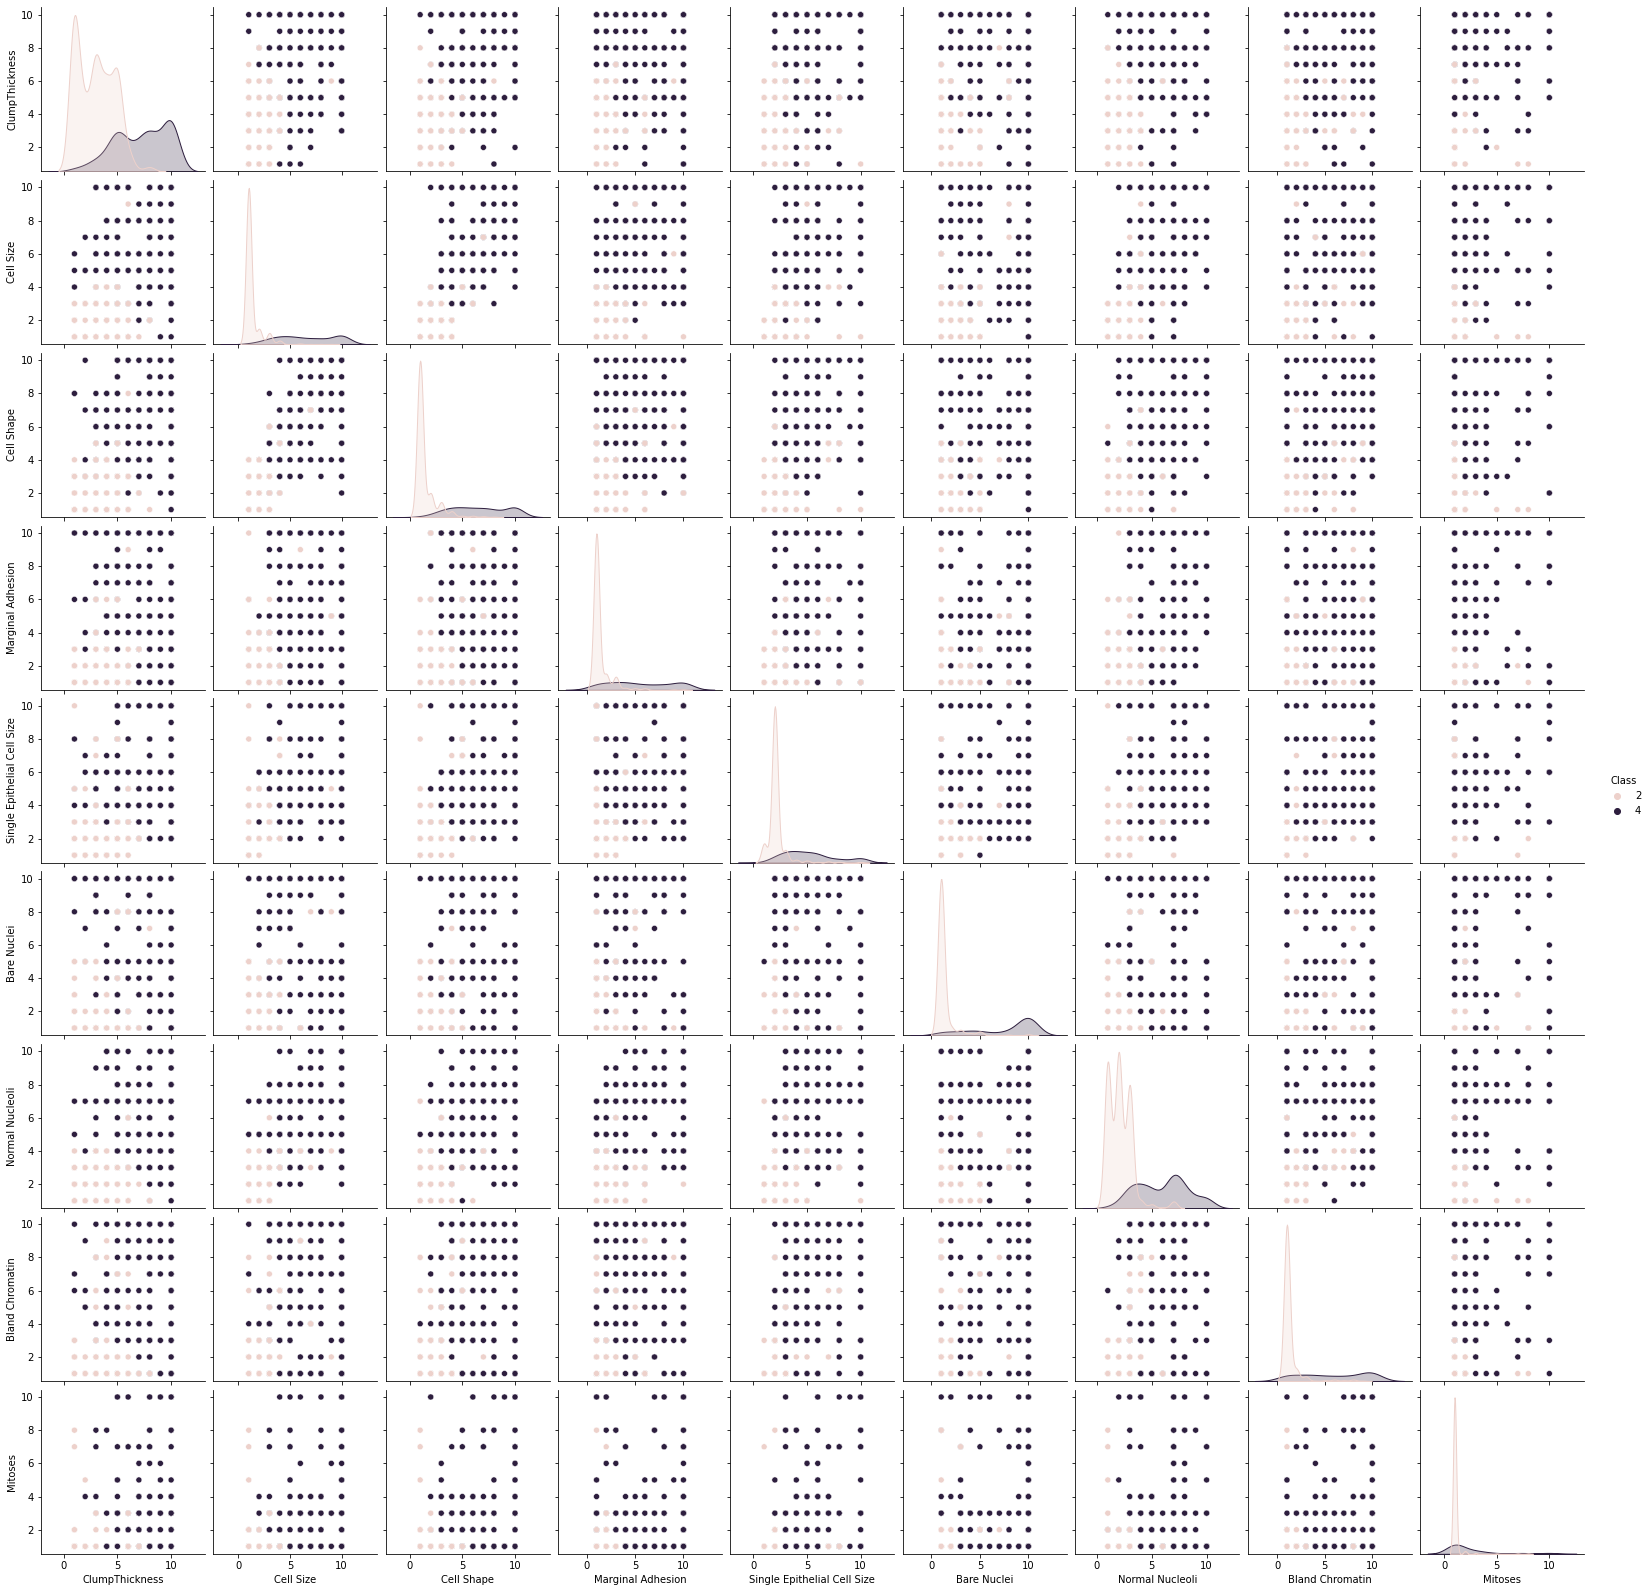

In [317]:
#Let us check the pair plot

sns.pairplot(cancer_df,diag_kind='kde',hue='Class')

 <font color=darkblue>

# Observation from above Pair Plot:

- Even though there are strong correlation, from the Pair plot it is visible there is no linear relationship.
- Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is Between 1 to 10.
-  Most of the Correlation are looks to be Guassian.
- With respect to the target column (Class), there is no overlapping distribution for all the attributes except Mitoses.

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [237]:
def Outlier_IQR(df):
    for column in df.columns:
        q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
        # calculate the IQR
        iqr = q75 - q25
        # calculate the outlier cutoff
        cut_off = iqr * 1.5
        # calculate the lower and upper bound value
        lower, upper = q25 - cut_off, q75 + cut_off
        print('The IQR for {} is {}'.format (column,iqr))
        print('The lower Wiskers limit for {} is {}'.format(column,lower))
        print('The upper Wiskers limit for {} is {}'.format(column,upper))
        # Calculate the number of records below and above lower and above bound value respectively
        cancer_df1 = cancer_df[cancer_df[column] > upper]
        cancer_df2 = cancer_df[cancer_df[column] < lower]
        print('Total number of outliers for column {} is {}'
                    .format(column,(cancer_df1.shape[0]+ cancer_df2.shape[0])))

In [238]:
Outlier_IQR(cancer_df)

The IQR for ClumpThickness is 4.0
The lower Wiskers limit for ClumpThickness is -4.0
The upper Wiskers limit for ClumpThickness is 12.0
Total number of outliers for column ClumpThickness is 0
The IQR for Cell Size is 4.0
The lower Wiskers limit for Cell Size is -5.0
The upper Wiskers limit for Cell Size is 11.0
Total number of outliers for column Cell Size is 0
The IQR for Cell Shape is 4.0
The lower Wiskers limit for Cell Shape is -5.0
The upper Wiskers limit for Cell Shape is 11.0
Total number of outliers for column Cell Shape is 0
The IQR for Marginal Adhesion is 3.0
The lower Wiskers limit for Marginal Adhesion is -3.5
The upper Wiskers limit for Marginal Adhesion is 8.5
Total number of outliers for column Marginal Adhesion is 60
The IQR for Single Epithelial Cell Size is 2.0
The lower Wiskers limit for Single Epithelial Cell Size is -1.0
The upper Wiskers limit for Single Epithelial Cell Size is 7.0
Total number of outliers for column Single Epithelial Cell Size is 52
The IQR for 

<AxesSubplot:>

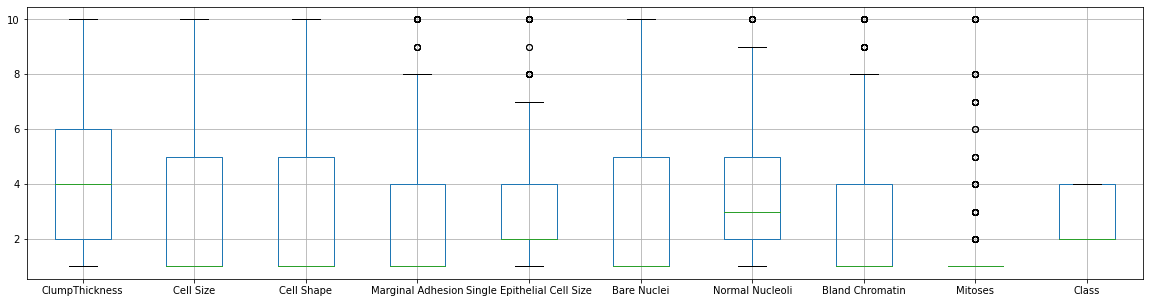

In [224]:
cancer_df.boxplot(figsize=(20,5))

 <font color=darkblue>

# Observations from Box Plot:
- From the above boxplot Marginal Adhesion, Single Epithelial Cell Size, Normal Nucleoli, Bland Chromatin and Mitoses have few data points ouside the Upper Wiskers Limit. Hence We need to treat the Outliers.

In [234]:
cancer_df['Mitoses'].value_counts()

1     571
2      35
3      32
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

In [318]:
#  As Mitoses doesn't contribute a strong correlation and there are  119 data points outside the Upper Wiskers limit,
# hence we are dropping it.


cancer_df.drop('Mitoses',axis=1,inplace=True)

In [319]:
# Treating the Outliers for Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli and Bland Chromatin
cancer_df.loc[cancer_df['Marginal Adhesion'] > 8, 'Marginal Adhesion'] = 8
cancer_df.loc[cancer_df['Single Epithelial Cell Size'] > 7, 'Single Epithelial Cell Size'] = 7
cancer_df.loc[cancer_df['Normal Nucleoli'] > 9, 'Normal Nucleoli'] = 9
cancer_df.loc[cancer_df['Bland Chromatin'] > 8, 'Bland Chromatin'] = 8

<AxesSubplot:>

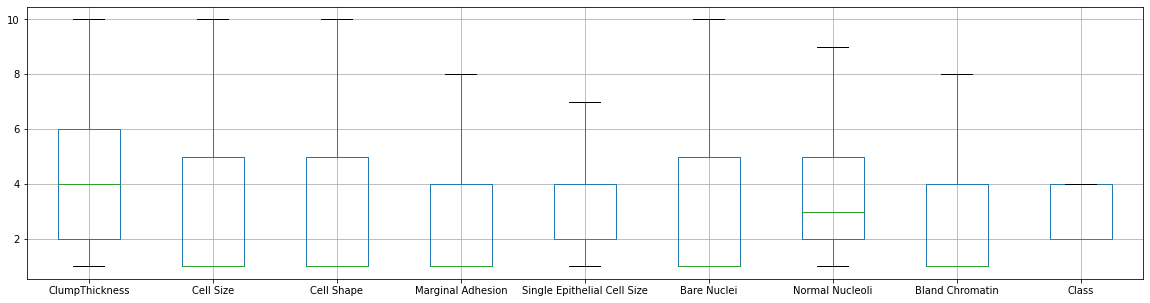

In [320]:
cancer_df.boxplot(figsize=(20,5))

# Q6 Create a covariance matrix for identifying Principal components

In [321]:
# PCA
# Step 1 - Create covariance matrix

cancer_df.drop('Class',axis=1,inplace=True)

In [322]:
cov_matrix = np.cov(cancer_df.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 7.93762016  5.51311079  5.45212343  3.52595444  2.7211081   6.01908248
   3.78585642  4.0697966 ]
 [ 5.51311079  9.25650701  8.15558781  5.51117562  4.20261248  7.53352685
   5.4782777   5.86202225]
 [ 5.45212343  8.15558781  8.76659936  5.17825456  3.93215751  7.54129488
   5.18516438  5.66958415]
 [ 3.52595444  5.51117562  5.17825456  6.14316905  2.92480596  6.16971036
   4.04251909  4.13121727]
 [ 2.7211081   4.20261248  3.93215751  2.92480596  3.1312362   4.00301003
   2.76714205  3.21245031]
 [ 6.01908248  7.53352685  7.54129488  6.16971036  4.00301003 13.08315139
   5.83655581  5.72093772]
 [ 3.78585642  5.4782777   5.18516438  4.04251909  2.76714205  5.83655581
   5.62055699  4.24437223]
 [ 4.0697966   5.86202225  5.66958415  4.13121727  3.21245031  5.72093772
   4.24437223  6.94449212]]


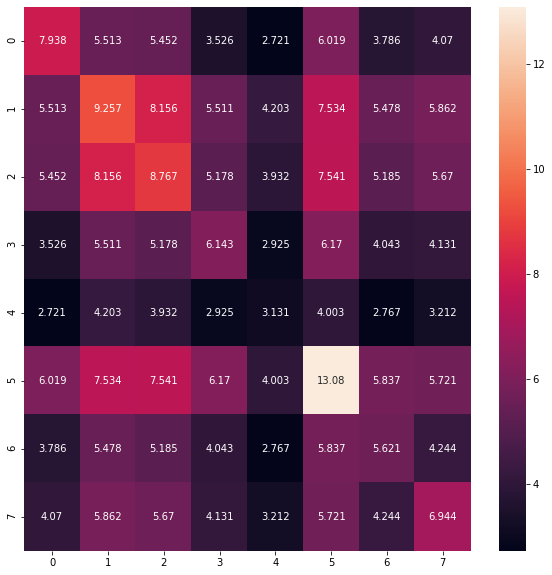

In [323]:
plt.figure(figsize=(10,10))
sns.heatmap(cov_matrix, annot=True, fmt='.4g') 
plt.show()

# Q7 Identify eigen values and eigen vector

In [324]:
# Step 2- Get eigen values and eigen vector

In [325]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.31719888 -0.07528555 -0.91251977  0.0742995   0.23200557  0.03684812
   0.01778929 -0.00183623]
 [-0.42228661 -0.33046648  0.09973766 -0.37376694 -0.19109509  0.02593742
   0.11353091 -0.71605673]
 [-0.41005114 -0.26653421  0.04188218 -0.35034225 -0.34752929  0.08367114
  -0.40847046  0.58454955]
 [-0.30586475  0.06148296  0.30615497 -0.13306547  0.80477873  0.34771851
  -0.14539946  0.03887612]
 [-0.21642998 -0.12790096  0.09983145 -0.01063544 -0.02731131  0.1327316
   0.88318487  0.35824696]
 [-0.46746514  0.83840221  0.03439723  0.05878517 -0.25966924  0.04695762
   0.01449035 -0.06384442]
 [-0.30018638 -0.04763207  0.1387124   0.07603304  0.2386383  -0.90461819
   0.01387514  0.084394  ]
 [-0.32231389 -0.29792218  0.17743861  0.83963201 -0.12684012  0.17861602
  -0.13559925 -0.0671603 ]]

 Eigen Values 
%s [44.17066897  4.65306935  4.01038881  2.41892562  2.07250831  1.72878008
  1.04208273  0.78690841]


# Q8 Find variance and cumulative variance by each eigen vector

In [326]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print("Variance Explained", var_exp)

Variance Explained [72.54969022356309, 7.642599670716948, 6.587006102603746, 3.9730506274267894, 3.404065177107011, 2.839496485178388, 1.711605941914376, 1.292485771489648]


In [327]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 72.54969022  80.19228989  86.779296    90.75234662  94.1564118
  96.99590829  98.70751423 100.        ]


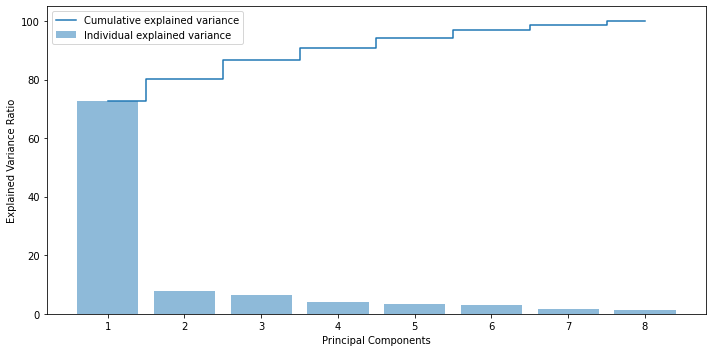

In [328]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

 <font color=darkblue>

# Observations:
- From the above plot Cumulative Explained Variance is high for Column 7 and Column 8 as above 95%
- There are more information available on column 1 to column 6 which contribute over 95%.
- For the PCA analysis, hence we are dropping column 7 and Column 8.

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [329]:
from sklearn.decomposition import PCA

In [332]:
pca = PCA(n_components=6)

In [333]:
X_reduced = pd.DataFrame(pca.fit_transform(cancer_df))

print(X_reduced)

            0         1         2         3         4         5
0   -4.184476  0.278434 -1.880207 -0.252110 -0.759471  0.984561
1    5.147646 -4.784689  0.755443  1.136958  0.237707 -2.000031
2   -4.351409 -0.710540 -0.020770 -0.162296 -0.035791  1.011299
3    5.511796  3.932952 -0.533733 -0.461157  4.346254 -1.164848
4   -3.889945  0.080182 -0.355377  0.088321 -2.137023  0.325972
..        ...       ...       ...       ...       ...       ...
685 -4.735351 -0.677903 -0.198364  0.000406  0.468797 -0.930668
686 -5.736445 -0.042687  0.579927  0.122855  0.413822 -0.714131
687  9.692503  6.814790  2.510265  0.209022  2.829175  1.817852
688  6.453695  3.052733  2.780843 -0.230612  0.142200  3.639360
689  7.618929  2.217973  2.950113  2.234252  0.065781  3.301842

[690 rows x 6 columns]


In [334]:
covMatrix = np.cov(X_reduced.T)
print('Covariance Matrix \n%s', covMatrix)

Covariance Matrix 
%s [[ 4.41706690e+01  7.42512003e-16  3.30005334e-16  3.71256001e-16
  -9.48765337e-16  9.90016003e-16]
 [ 7.42512003e-16  4.65306935e+00  1.11376800e-15 -6.84503252e-16
   5.42704085e-16 -3.19692668e-16]
 [ 3.30005334e-16  1.11376800e-15  4.01038881e+00 -1.03126667e-16
   4.74382668e-16  2.68129334e-16]
 [ 3.71256001e-16 -6.84503252e-16 -1.03126667e-16  2.41892562e+00
   9.53921670e-16 -9.02358336e-16]
 [-9.48765337e-16  5.42704085e-16  4.74382668e-16  9.53921670e-16
   2.07250831e+00  1.85628001e-16]
 [ 9.90016003e-16 -3.19692668e-16  2.68129334e-16 -9.02358336e-16
   1.85628001e-16  1.72878008e+00]]


In [335]:
pca.components_

array([[ 0.31719888,  0.42228661,  0.41005114,  0.30586475,  0.21642998,
         0.46746514,  0.30018638,  0.32231389],
       [ 0.07528555,  0.33046648,  0.26653421, -0.06148296,  0.12790096,
        -0.83840221,  0.04763207,  0.29792218],
       [-0.91251977,  0.09973766,  0.04188218,  0.30615497,  0.09983145,
         0.03439723,  0.1387124 ,  0.17743861],
       [-0.0742995 ,  0.37376694,  0.35034225,  0.13306547,  0.01063544,
        -0.05878517, -0.07603304, -0.83963201],
       [-0.23200557,  0.19109509,  0.34752929, -0.80477873,  0.02731131,
         0.25966924, -0.2386383 ,  0.12684012],
       [-0.03684812, -0.02593742, -0.08367114, -0.34771851, -0.1327316 ,
        -0.04695762,  0.90461819, -0.17861602]])

# Q10 Find correlation between components and features

In [340]:
corr_comp_feature = pd.DataFrame(pca.components_, columns=list(cancer_df.columns))

In [341]:
corr_comp_feature.head(6)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin
0,0.317199,0.422287,0.410051,0.305865,0.216430,0.467465,0.300186,0.322314
1,0.075286,0.330466,0.266534,-0.061483,0.127901,-0.838402,0.047632,0.297922
2,-0.912520,0.099738,0.041882,0.306155,0.099831,0.034397,0.138712,0.177439
3,-0.074299,0.373767,0.350342,0.133065,0.010635,-0.058785,-0.076033,-0.839632
4,-0.232006,0.191095,0.347529,-0.804779,0.027311,0.259669,-0.238638,0.126840
5,-0.036848,-0.025937,-0.083671,-0.347719,-0.132732,-0.046958,0.904618,-0.178616


In [342]:
vectors = pca.components_.round(4)
#Print feature effects
print("PC 1 effects=" + str(dict(zip(cancer_df.columns,vectors[0]))))
print("PC 2 effects=" + str(dict(zip(cancer_df.columns,vectors[1]))))
print("PC 3 effects=" + str(dict(zip(cancer_df.columns,vectors[2]))))
print("PC 4 effects=" + str(dict(zip(cancer_df.columns,vectors[3]))))
print("PC 5 effects=" + str(dict(zip(cancer_df.columns,vectors[4]))))
print("PC 6 effects=" + str(dict(zip(cancer_df.columns,vectors[5]))))

PC 1 effects={'ClumpThickness': 0.3172, 'Cell Size': 0.4223, 'Cell Shape': 0.4101, 'Marginal Adhesion': 0.3059, 'Single Epithelial Cell Size': 0.2164, 'Bare Nuclei': 0.4675, 'Normal Nucleoli': 0.3002, 'Bland Chromatin': 0.3223}
PC 2 effects={'ClumpThickness': 0.0753, 'Cell Size': 0.3305, 'Cell Shape': 0.2665, 'Marginal Adhesion': -0.0615, 'Single Epithelial Cell Size': 0.1279, 'Bare Nuclei': -0.8384, 'Normal Nucleoli': 0.0476, 'Bland Chromatin': 0.2979}
PC 3 effects={'ClumpThickness': -0.9125, 'Cell Size': 0.0997, 'Cell Shape': 0.0419, 'Marginal Adhesion': 0.3062, 'Single Epithelial Cell Size': 0.0998, 'Bare Nuclei': 0.0344, 'Normal Nucleoli': 0.1387, 'Bland Chromatin': 0.1774}
PC 4 effects={'ClumpThickness': -0.0743, 'Cell Size': 0.3738, 'Cell Shape': 0.3503, 'Marginal Adhesion': 0.1331, 'Single Epithelial Cell Size': 0.0106, 'Bare Nuclei': -0.0588, 'Normal Nucleoli': -0.076, 'Bland Chromatin': -0.8396}
PC 5 effects={'ClumpThickness': -0.232, 'Cell Size': 0.1911, 'Cell Shape': 0.3475,

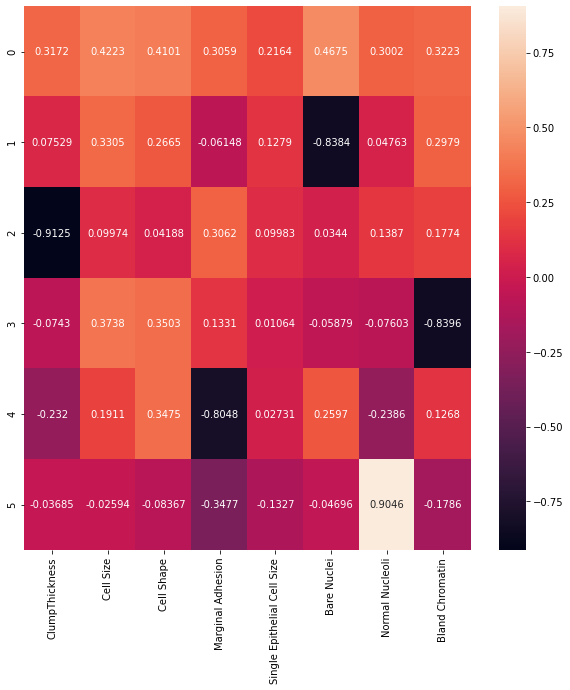

In [339]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_comp_feature, annot=True, fmt='.4g') 
plt.show()

 <font color=darkblue>

# Observations:
- PC1 has the strong positive correlation for all the 6 selected attributes,as this says there is a postive relation on finding the target column.
- PC6 has the week negative correlation for all the 6 selected attributes.
- For the independent attributes.
    - PC1 has the high positive correlation for ClumpThickness and PC2 has the week correlation among other PC components with respect to ClumpThickness.
    - PC1 has the high positive correlation for Cell Size and PC5 has the week correlation among other PC components with respect to Cell Size.
    - PC1 has the high positive correlation for Cell Shape and PC5 has the week correlation with repect to Cell Shape.
    - PC1 has the high positive correlation for Marginal Adhesion and PC5 has the week correlation for Marginal Adhesion.
    - PC1 has the high positive correlation for Single Epithelial Cell Size and PC5 has the week correlation for Single Epithelial Cell Size.
    - PC1 has the high positive correlation for Bare Nuclei and PC3 has the week correlation for Bare Nuclei.
    - PC5 has the high positive correlation for Normal Nucleoli and PC4 has the week correlation for Normal Nuclei.
    - PC1 has the high positive correlation for Bland Chromatin and PC3 has the week correlation for Bland Chromatin.